In [ ]:
#/nfs/ceph_geomar/smomw398/CROCO_BioEBUS_1980_2015/INPUT 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm # for oceanography-specific colormaps
from scipy.io import loadmat
import numpy as np
import re
from xml.etree import ElementTree as ET
from matplotlib.path import Path
import pandas as pd

### Old hindcast input winds 1990-2010

In [34]:
# ls '../../NHCS/Winds_input/hindcast_1990_2010/CROCO_BioEBUS_OSMOSE_input/'

import xarray as xr

# Open the input file
file = "../../NHCS/Winds_input/hindcast_1990_2010/CROCO_BioEBUS_OSMOSE_input/mean_croco_blk_NCEP2_Y1990M09.nc"
ds = xr.open_dataset(file)

# Extract year and month from the filename
year = int(file.split("Y")[1][:4])
month = int(file.split("M")[1][:2])

# Set the time variable
ds['time'] = [f"{year}-{month:02d}-01"]

# Write the new NetCDF file
output_file = file.replace(".nc", "_with_time.nc")
ds.to_netcdf(output_file)

print(f"Processed {file}: Set time to {year}-{month:02d}-01")

ValueError: invalid literal for int() with base 10: 'OS'

In [32]:
ds = xr.open_mfdataset('../../NHCS/Winds_input/hindcast_1990_2010/CROCO_BioEBUS_OSMOSE_input/mean_croco_blk_NCEP2_Y1990M08_with_time.nc', 
                     chunks = {'time':1}).bulk_time
ds

<xarray.DataArray 'bulk_time' (bulk_time: 1)> Size: 8B
array([199008.5])
Coordinates:
  * bulk_time  (bulk_time) float64 8B 1.99e+05
Attributes:
    standard_name:  time
    long_name:      bulk formulation execution time
    units:          month as %Y%m.%f
    calendar:       proleptic_gregorian
    axis:           T

In [21]:
ds = xr.open_mfdataset('../../NHCS/Winds_input/hindcast_1990_2010/CROCO_BioEBUS_OSMOSE_input/mean_croco_blk_NCEP2_Y*.nc', 
                     chunks = {'time':1}).bulk_time
ds

<xarray.DataArray 'bulk_time' (bulk_time: 74)> Size: 592B
array([-970401600000000000, -969019200000000000, -967809600000000000,
          8758800000000000,    8769600000000000,    8812800000000000,
          8845200000000000,    8856000000000000,    9072000000000000,
          9115200000000000,    9158400000000000,    9190800000000000,
          9201600000000000,    9504000000000000,    9536400000000000,
          9547200000000000,    9590400000000000,    9849600000000000,
          9892800000000000,    9936000000000000,   10065600000000000,
         10238400000000000,   10281600000000000,   10324800000000000,
         10411200000000000,   10584000000000000,   10627200000000000,
         10713600000000000,   10746000000000000,   10756800000000000,
         10972800000000000,   11016000000000000,   11059200000000000,
         11091600000000000,   11102400000000000,   11318400000000000,
         11361600000000000,   17409600000000000,   19656000000000000,
         26038800000000000,   26049600000000000,   27561600000000000,
         34689600000000000,   35424000000000000,   37195200000000000,
         43329600000000000,   45878400000000000,   51969600000000000,
         53827200000000000,   60609600000000000,   61722000000000000,
         69249600000000000,   69595200000000000,   77889600000000000,
         80136000000000000,   86518800000000000,   86529600000000000,
         88084800000000000,   95169600000000000,   96033600000000000,
        103766400000000000,  103809600000000000,  106401600000000000,
        121078800000000000,  872769600000000000,  874670400000000000,
        881409600000000000,  882576000000000000,  890222400000000000,
        890611200000000000,  898862400000000000,  901065600000000000,
        907502400000000000,  909014400000000000], dtype='timedelta64[ns]')
Coordinates:
  * bulk_time  (bulk_time) timedelta64[ns] 592B -11232 days +12:00:00 ... 105...
Attributes:
    standard_name:  time
    long_name:      bulk formulation execution time
    bounds:         bulk_time_bnds
    calendar:       proleptic_gregorian
    axis:           T

(array([2.317469e+06, 1.054579e+06, 1.293766e+06, 2.544275e+06,
        5.752377e+06, 6.785843e+06, 3.741488e+06, 6.315540e+05,
        2.073700e+04, 2.928000e+03]),
 array([ 0.65512957,  1.76195217,  2.86877477,  3.97559737,  5.08241997,
         6.18924257,  7.29606517,  8.40288777,  9.50971037, 10.61653297,
        11.72335557]),
 <BarContainer object of 10 artists>)

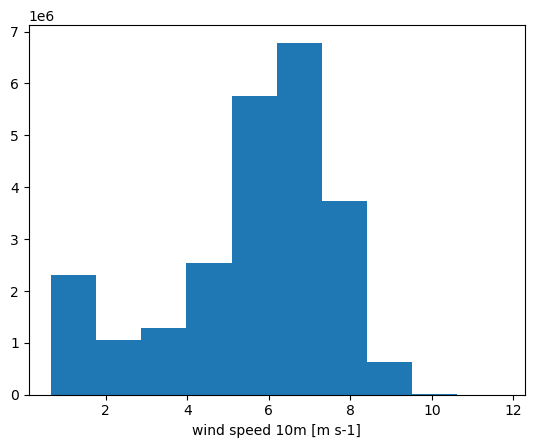

In [3]:
ds.wspd.plot()

### New Hindcast input winds

In [35]:
ds_new = xr.open_mfdataset('../../NHCS/Winds_input/hindcast_1980_2015/INPUT/mean_*with*.nc', 
                     chunks = {'time':1}).bulk_time
ds_new

<xarray.DataArray 'bulk_time' (bulk_time: 109)> Size: 872B
array([1.015000e+02, 1.980105e+05, 1.980115e+05, 1.980125e+05, 1.981105e+05,
       1.981115e+05, 1.981125e+05, 1.982105e+05, 1.982115e+05, 1.982125e+05,
       1.983105e+05, 1.983115e+05, 1.983125e+05, 1.984105e+05, 1.984115e+05,
       1.984125e+05, 1.985105e+05, 1.985115e+05, 1.985125e+05, 1.986105e+05,
       1.986115e+05, 1.986125e+05, 1.987105e+05, 1.987115e+05, 1.987125e+05,
       1.988105e+05, 1.988115e+05, 1.988125e+05, 1.989105e+05, 1.989115e+05,
       1.989125e+05, 1.990105e+05, 1.990115e+05, 1.990125e+05, 1.991105e+05,
       1.991115e+05, 1.991125e+05, 1.992105e+05, 1.992115e+05, 1.992125e+05,
       1.993105e+05, 1.993115e+05, 1.993125e+05, 1.994105e+05, 1.994115e+05,
       1.994125e+05, 1.995105e+05, 1.995115e+05, 1.995125e+05, 1.996105e+05,
       1.996115e+05, 1.996125e+05, 1.997105e+05, 1.997115e+05, 1.997125e+05,
       1.998105e+05, 1.998115e+05, 1.998125e+05, 1.999105e+05, 1.999115e+05,
       1.999125e+05, 2.000105e+05, 2.000115e+05, 2.000125e+05, 2.001105e+05,
       2.001115e+05, 2.001125e+05, 2.002105e+05, 2.002115e+05, 2.002125e+05,
       2.003105e+05, 2.003115e+05, 2.003125e+05, 2.004105e+05, 2.004115e+05,
       2.004125e+05, 2.005105e+05, 2.005115e+05, 2.005125e+05, 2.006105e+05,
       2.006115e+05, 2.006125e+05, 2.007105e+05, 2.007115e+05, 2.007125e+05,
       2.008105e+05, 2.008115e+05, 2.008125e+05, 2.009105e+05, 2.009115e+05,
       2.009125e+05, 2.010105e+05, 2.010115e+05, 2.010125e+05, 2.011105e+05,
       2.011115e+05, 2.011125e+05, 2.012105e+05, 2.012115e+05, 2.012125e+05,
       2.013105e+05, 2.013115e+05, 2.013125e+05, 2.014105e+05, 2.014115e+05,
       2.014125e+05, 2.015105e+05, 2.015115e+05, 2.015125e+05])
Coordinates:
  * bulk_time  (bulk_time) float64 872B 101.5 1.98e+05 ... 2.015e+05 2.015e+05
Attributes:
    standard_name:  time
    long_name:      bulk formulation execution time
    calendar:       proleptic_gregorian
    axis:           T
    units:          month as %Y%m.%f